# ANALISE SOBRE DADOS DAS OLIMPIADAS ENTRE ANOS DE 1896 E 2016

In [1]:
# Import das bibiliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
# Criação dos DataFrames
df = pd.read_csv('athlete_events.csv')
df_summer = df.loc[df['Season'] ==  'Summer']
df_summer = df_summer.drop(columns=['NOC', 'Games', 'Season', 'Age', 'Height', 'Weight', 'City'])

df_summer['Team'] = df_summer['Team'].str.replace("-1" , "")
df_summer['Team'] = df_summer['Team'].str.replace("-2" , "")
df_summer['Team'] = df_summer['Team'].str.replace("-3" , "")

df_brazil = df_summer.loc[(df['Team'] == 'Brazil')]

df_medals = df_summer.dropna(subset=['Medal'])
df_medals_brazil = df_medals.loc[df_medals['Team'] == 'Brazil']

## Evolução do número de atletas ao longo dos anos nas Olimpiadas

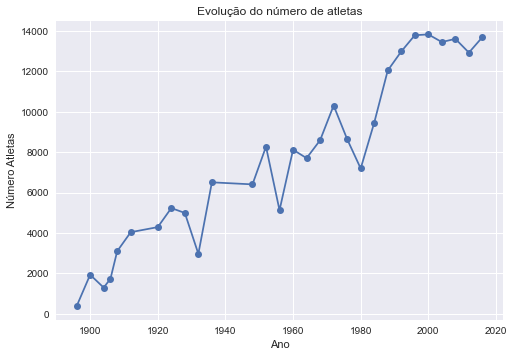

In [3]:
# Evolução do número de atletas ao longo dos anos nas Olimpiadas
# df_summer.groupby('Year').size()
df_summer.groupby('Year').size().plot(marker="o")
plt.title("Evolução do número de atletas")
plt.xlabel("Ano")
plt.ylabel("Número Atletas");

## Evolução do número de esporte olimpicos

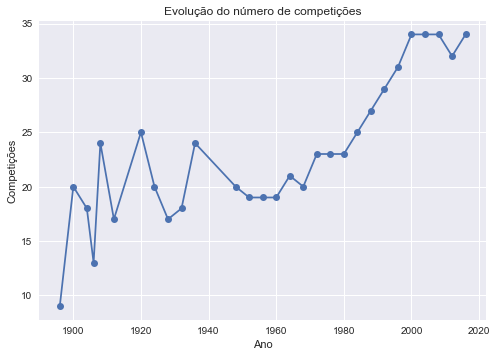

In [4]:
# Evolução do número de esporte olimpicos
# df_summer.groupby('Year').Sport.nunique()
df_summer.groupby('Year').Sport.nunique().plot(marker='o')
plt.title("Evolução do número de competições")
plt.xlabel("Ano")
plt.ylabel("Competições");

## Paises com mais medalhas

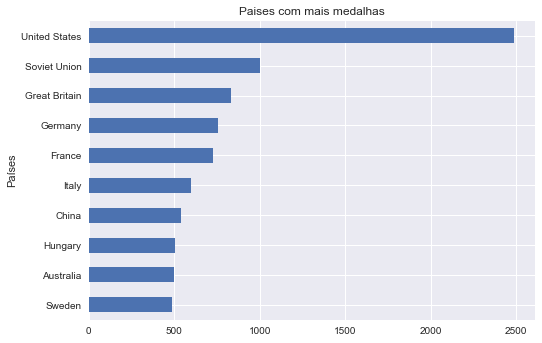

In [5]:
# Paises com mais medalhas
df_medals_paises = df_medals[['Year', 'Team', 'Event', 'Medal']].drop_duplicates()
df_medals_paises.groupby('Team').size().nlargest(10).sort_values(ascending=False).plot.barh(title="Paises com mais medalhas")
plt.ylabel("Países")
plt.gca().invert_yaxis();

## Top10 atletas com mais medalhas

In [6]:
# Top10 atletas com mais medalhas
df_medals.groupby(['Name', 'Team', 'Sport']).size().sort_values(ascending=False).nlargest(10);

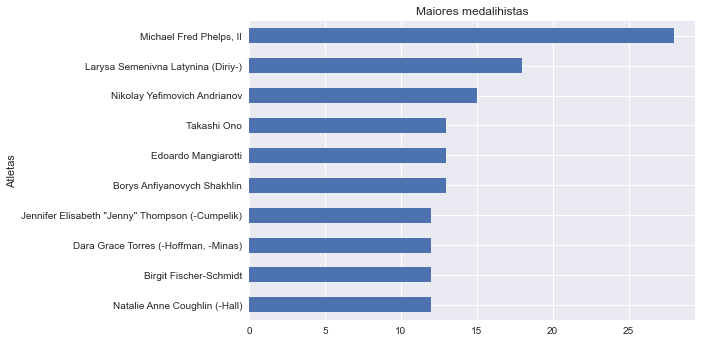

In [7]:
df_medals.groupby(['Name']).size().sort_values(ascending=False).nlargest(10).plot.barh(title="Maiores medalihistas")
plt.gca().invert_yaxis()
plt.ylabel("Atletas");

# Participação Feminina
## Número de mulheres

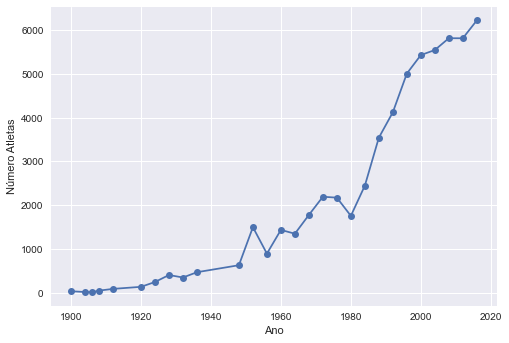

In [8]:
df_summer.loc[df_summer['Sex'] == 'F'].groupby('Year').size().plot(marker='o')
plt.xlabel("Ano")
plt.ylabel("Número Atletas");

## Contraste entre mulheres e homens em Olimpiadas

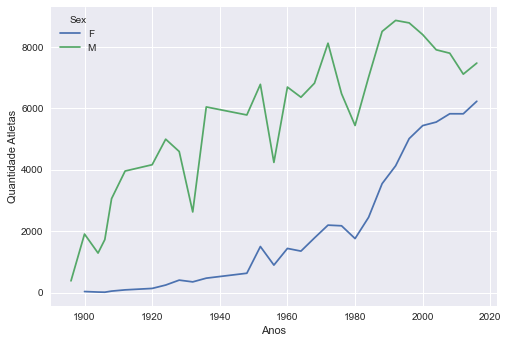

In [9]:
df_summer.groupby(['Year', 'Sex']).size().reset_index().rename(columns={0 : 'Qtd'}).pivot(index='Year', columns='Sex', values='Qtd').plot()
plt.xlabel("Anos")
plt.ylabel("Quantidade Atletas");

# Informação sobre a Participação do Brasil

## Número medalhas

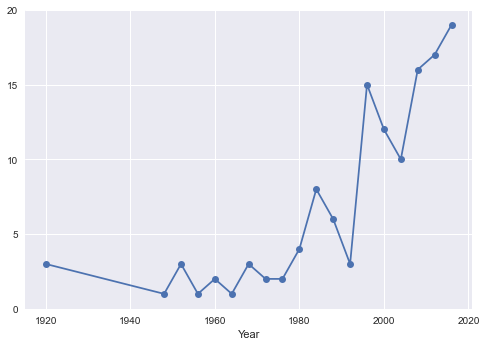

In [10]:
# Evolução do número total de medalhas do Brasil
df_medals_brazil_total = df_medals_brazil[['Year', 'Event', 'Medal']].drop_duplicates().groupby('Year').size()
df_medals_brazil_total.plot(yticks=[0, 5, 10, 15, 20], marker='o');

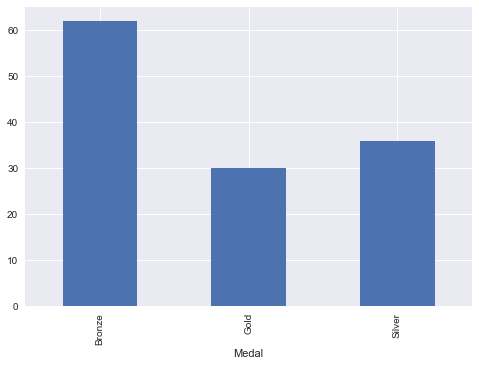

In [11]:
# Quais medalhas o Brasil mais tem?
df_medals_brazil[['Year', 'Event', 'Medal']].drop_duplicates().groupby('Medal').size().plot.bar();

## Esportes com mais medalhas

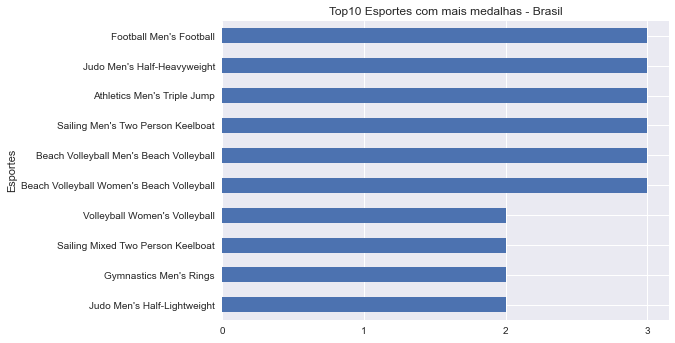

In [12]:
df_medals_brazil_sports = df_medals_brazil[['Event','Medal']].drop_duplicates()
df_medals_brazil_sports.groupby('Event').size().sort_values(ascending=False).nlargest(10).plot.barh(title="Top10 Esportes com mais medalhas - Brasil", xticks=[0, 1, 2, 3])
plt.gca().invert_yaxis()
plt.ylabel("Esportes");

## Número de atletas brasileiros

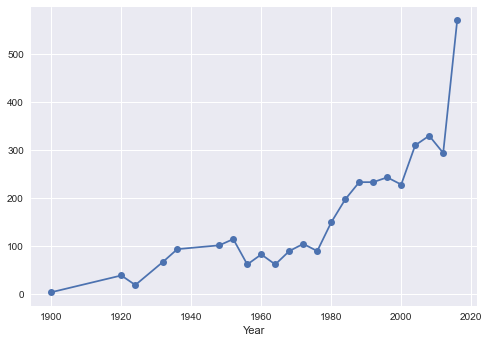

In [13]:
df_brazil[['Name', 'Year']].groupby('Year').size().plot(marker='o');

## Número de atletas femininas vs atletas masculinos

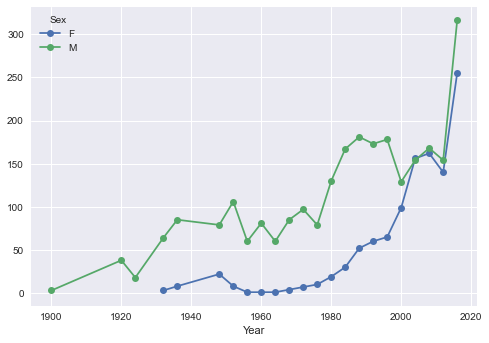

In [14]:
df_brazil[['Name', 'Sex', 'Year']].groupby(['Year', 'Sex']).size().reset_index().rename(columns={0: "Qtd"}).pivot(index='Year', columns='Sex', values='Qtd').plot(marker='o');

## Top10 Atletas com mais medalhas

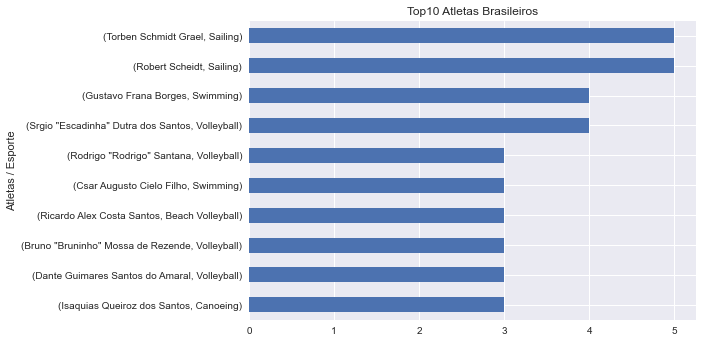

In [23]:
# Top10 atletas Brazil com mais medalhas
df_medals_brazil_top10 = df_medals_brazil.groupby(['Name', 'Sport']).size().sort_values(ascending=False).nlargest(10)
df_medals_brazil_top10.plot.barh(title='Top10 Atletas Brasileiros')
plt.gca().invert_yaxis()
plt.ylabel("Atletas / Esporte");